TP PARTIE 1 — STATISTIQUES ET LOI NORMALE EN FINANCE
Analyse risque portefeuille et calcul VaR

QUESTION 1.1 — STATISTIQUES DESCRIPTIVES

📊 PORTEFEUILLE CONSERVATIVE (A)
	• Rendement mensuel moyen : 0.94%
	• Écart-type mensuel : 0.48%
	• Médiane : 1.00%
	• Rendement annualisé : 11.85%
	• Volatilité annualisée : 1.65%

📊 PORTEFEUILLE AGRESSIF (B)
	• Rendement mensuel moyen : 2.89%
	• Écart-type mensuel : 4.45%
	• Médiane : 4.70%
	• Rendement annualisé : 40.79%
	• Volatilité annualisée : 15.41%

QUESTION 1.2 — VISUALISATION DISTRIBUTIONS


/tmp/ipython-input-1357555428.py:121: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax2.boxplot(data_boxplot, labels=['Portefeuille A', 'Portefeuille B'], patch_artist=True, widths=0.6)


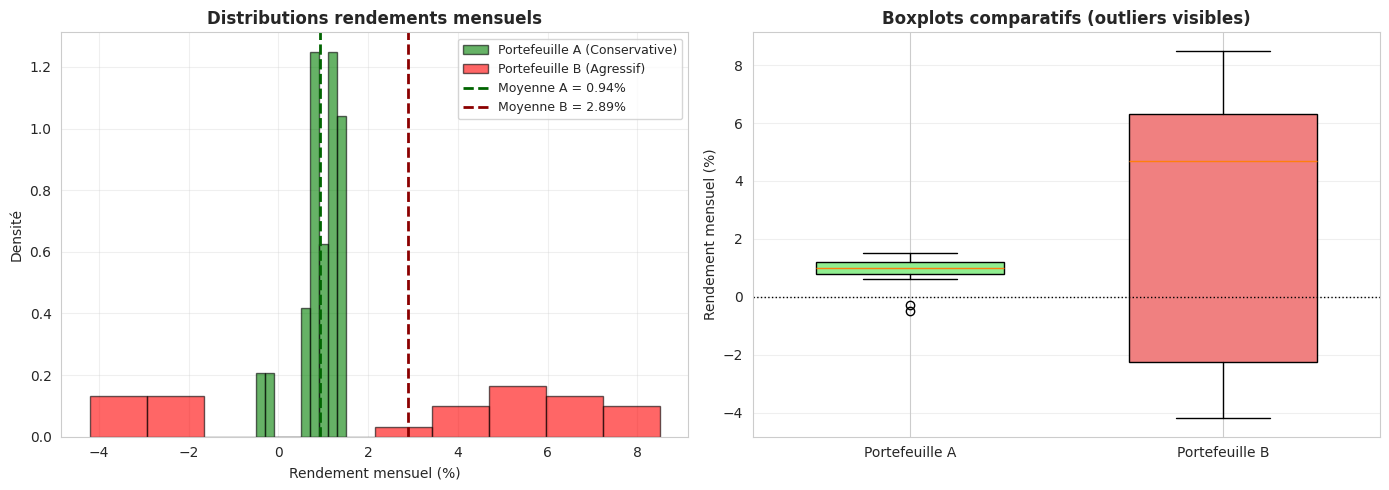

✓ Graphiques générés (histogrammes + boxplots)

QUESTION 1.3 — VALUE AT RISK (VaR 95%)

💰 CAPITAL INVESTI : €500,000
🚨 PERTE MAX TOLÉRÉE CLIENT : €50,000 (-10%)

📉 PORTEFEUILLE A (Conservative)
	• VaR 95% mensuelle : 0.15% → €763
	• VaR 95% annuelle : 9.13% → €45,649

📉 PORTEFEUILLE B (Agressif)
	• VaR 95% mensuelle : -4.42% → €-22,118
	• VaR 95% annuelle : 15.45% → €77,231

✅ VALIDATION CONTRAINTE CLIENT (VaR annuelle ≤ -€50,000) :
	• Portefeuille A : ✓ RESPECTÉE (45,649 € vs -50,000 €)
	• Portefeuille B : ✗ NON RESPECTÉE (77,231 € vs -50,000 €)

🔬 TEST NORMALITÉ (Shapiro-Wilk, H0: données normales)

	PORTEFEUILLE A :
	• Statistique Shapiro : 0.8032
	• P-value : 0.0003
	✗ Données s'écartent loi normale (p < 0.05) → VaR paramétrique moins fiable

	PORTEFEUILLE B :
	• Statistique Shapiro : 0.8366
	• P-value : 0.0012
	✗ Données s'écartent loi normale (p < 0.05) → VaR paramétrique moins fiable

QUESTION 1.4 — RATIO SHARPE ET RECOMMANDATION CLIENT

📊 RATIO SHARPE (Rendement ajusté risque)


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Configuration
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (14, 6)

print("="*80)
print("TP PARTIE 1 — STATISTIQUES ET LOI NORMALE EN FINANCE")
print("Analyse risque portefeuille et calcul VaR")
print("="*80)

# ============================================================================ # DONNÉES
# ============================================================================

# Rendements mensuels historiques (%)
rendements_A = np.array([
    1.2, 0.8, -0.5, 1.5, 0.9, 1.1, 0.7, 1.3, 1.0, 0.6, 1.4, 0.8,
    1.1, 0.9, -0.3, 1.2, 1.0, 1.5, 0.8, 1.3, 0.9, 1.1, 1.2, 1.0
])

rendements_B = np.array([
    4.5, -2.1, 6.2, -3.5, 5.8, 7.1, -1.8, 4.9, 3.2, -4.2, 8.5, -2.7,
    5.1, 6.8, -3.1, 7.3, 4.5, -2.9, 6.7, 5.3, -3.8, 7.9, 4.2, 5.5
])

# Paramètres
capital = 500000 # € à investir
perte_max_toleree = 50000 # € (10% capital)
taux_sans_risque = 3.0 # % annuel

# ============================================================================ # QUESTION 1.1 — STATISTIQUES DESCRIPTIVES
# ============================================================================

print("\n" + "="*80)
print("QUESTION 1.1 — STATISTIQUES DESCRIPTIVES")
print("="*80)

def calculer_stats_portefeuille(rendements, nom):
    """
    Calcule statistiques descriptives portefeuille

    Parameters:
    rendements : np.array Rendements mensuels (%)
    nom : str
    Nom portefeuille
    Returns:
    dict : Statistiques calculées
    """
    # a) Moyenne mensuelle
    moyenne_mensuelle = np.mean(rendements)

    # b) Écart-type mensuel
    ecart_type_mensuel = np.std(rendements, ddof=1) # ddof=1 pour échantillon

    # c) Médiane
    mediane = np.median(rendements)

    # d) Rendement annualisé (capitalisation composée)
    # Formule : (1 + r_mensuel/100)^12 - 1
    rendement_annuel = ((1 + moyenne_mensuelle/100)**12 - 1) * 100

    # e) Volatilité annualisée
    # Formule : σ_annuel = σ_mensuel × √12
    volatilite_annuelle = ecart_type_mensuel * np.sqrt(12)

    s_dict = {
        'nom': nom,
        'moyenne_mensuelle': moyenne_mensuelle,
        'ecart_type_mensuel': ecart_type_mensuel,
        'mediane': mediane,
        'rendement_annuel': rendement_annuel,
        'volatilite_annuelle': volatilite_annuelle
    }

    return s_dict

# Calcul stats pour les deux portefeuilles
stats_A = calculer_stats_portefeuille(rendements_A, "CONSERVATIVE (A)")
stats_B = calculer_stats_portefeuille(rendements_B, "AGRESSIF (B)")

# Affichage résultats
for s in [stats_A, stats_B]: # Renamed loop variable from 'stats' to 's'
    print(f"\n📊 PORTEFEUILLE {s['nom']}")
    print(f"\t• Rendement mensuel moyen : {s['moyenne_mensuelle']:.2f}%")
    print(f"\t• Écart-type mensuel : {s['ecart_type_mensuel']:.2f}%")
    print(f"\t• Médiane : {s['mediane']:.2f}%")
    print(f"\t• Rendement annualisé : {s['rendement_annuel']:.2f}%")
    print(f"\t• Volatilité annualisée : {s['volatilite_annuelle']:.2f}%")

# ============================================================================ # QUESTION 1.2 — VISUALISATION DISTRIBUTIONS
# ============================================================================

print("\n" + "="*80)
print("QUESTION 1.2 — VISUALISATION DISTRIBUTIONS")
print("="*80)

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Subplot 1 : Histogrammes superposés
ax1 = axes[0]
ax1.hist(rendements_A, bins=10, alpha=0.6, color='green', edgecolor='black', label='Portefeuille A (Conservative)', density=True)
ax1.hist(rendements_B, bins=10, alpha=0.6, color='red', edgecolor='black', label='Portefeuille B (Agressif)', density=True)

# Lignes moyennes
ax1.axvline(stats_A['moyenne_mensuelle'], color='darkgreen', linestyle='--', linewidth=2, label=f'Moyenne A = {stats_A["moyenne_mensuelle"]:.2f}%')
ax1.axvline(stats_B['moyenne_mensuelle'], color='darkred', linestyle='--', linewidth=2, label=f'Moyenne B = {stats_B["moyenne_mensuelle"]:.2f}%')

ax1.set_title('Distributions rendements mensuels', fontsize=12, fontweight='bold')
ax1.set_xlabel('Rendement mensuel (%)')
ax1.set_ylabel('Densité')
ax1.legend(fontsize=9)
ax1.grid(True, alpha=0.3)

# Subplot 2 : Boxplots comparatifs
ax2 = axes[1]
data_boxplot = [rendements_A, rendements_B]
bp = ax2.boxplot(data_boxplot, labels=['Portefeuille A', 'Portefeuille B'], patch_artist=True, widths=0.6)

# Couleurs boxplots
colors = ['lightgreen', 'lightcoral']
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)

ax2.set_title('Boxplots comparatifs (outliers visibles)', fontsize=12, fontweight='bold')
ax2.set_ylabel('Rendement mensuel (%)')
ax2.grid(True, alpha=0.3, axis='y')
ax2.axhline(0, color='black', linestyle=':', linewidth=1)

plt.tight_layout()
plt.show()
print("✓ Graphiques générés (histogrammes + boxplots)")

# ============================================================================ # QUESTION 1.3 — VALUE AT RISK (VaR 95%)
# ============================================================================

print("\n" + "="*80)
print("QUESTION 1.3 — VALUE AT RISK (VaR 95%)")
print("="*80)

def calculer_var_portefeuille(stats_dict, capital, alpha=0.05):
    """
    Calcule VaR paramétrique mensuelle et annuelle
    Parameters:
    stats_dict : dict
    Statistiques portefeuille (from calculer_stats_portefeuille)
    capital : float
    Capital investi (€)
    alpha : float
    Niveau risque (0.05 pour VaR 95%)
    Returns:
    dict : VaR calculées
    """
    # Quantile normal standard pour alpha=5% (queue gauche)
    z_alpha = stats.norm.ppf(alpha) # ≈ -1.645

    # a) VaR mensuelle (%)
    var_mensuelle_pct = stats_dict['moyenne_mensuelle'] + z_alpha * stats_dict['ecart_type_mensuel']

    # b) VaR annuelle (%)
    # Méthode : Utiliser rendement et volatilité annualisés
    var_annuelle_pct = stats_dict['rendement_annuel'] + z_alpha * stats_dict['volatilite_annuelle']

    # c) VaR en perte monétaire (€)
    var_mensuelle_euros = capital * (var_mensuelle_pct / 100)
    var_annuelle_euros = capital * (var_annuelle_pct / 100)

    var_results = {
        'var_mensuelle_pct': var_mensuelle_pct,
        'var_annuelle_pct': var_annuelle_pct,
        'var_mensuelle_euros': var_mensuelle_euros,
        'var_annuelle_euros': var_annuelle_euros
    }

    return var_results

# Calcul VaR pour les deux portefeuilles
var_A = calculer_var_portefeuille(stats_A, capital)
var_B = calculer_var_portefeuille(stats_B, capital)

# Affichage résultats
print(f"\n💰 CAPITAL INVESTI : €{capital:,.0f}")
print(f"🚨 PERTE MAX TOLÉRÉE CLIENT : €{perte_max_toleree:,.0f} (-{perte_max_toleree/capital*100:.0f}%)")
print(f"\n📉 PORTEFEUILLE A (Conservative)")
print(f"\t• VaR 95% mensuelle : {var_A['var_mensuelle_pct']:.2f}% → €{var_A['var_mensuelle_euros']:,.0f}")
print(f"\t• VaR 95% annuelle : {var_A['var_annuelle_pct']:.2f}% → €{var_A['var_annuelle_euros']:,.0f}")
print(f"\n📉 PORTEFEUILLE B (Agressif)")
print(f"\t• VaR 95% mensuelle : {var_B['var_mensuelle_pct']:.2f}% → €{var_B['var_mensuelle_euros']:,.0f}")
print(f"\t• VaR 95% annuelle : {var_B['var_annuelle_pct']:.2f}% → €{var_B['var_annuelle_euros']:,.0f}")

# Vérification contrainte client
print(f"\n✅ VALIDATION CONTRAINTE CLIENT (VaR annuelle ≤ -€50,000) :")
contrainte_A = abs(var_A['var_annuelle_euros']) <= perte_max_toleree
contrainte_B = abs(var_B['var_annuelle_euros']) <= perte_max_toleree
print(f"\t• Portefeuille A : {'✓ RESPECTÉE' if contrainte_A else '✗ NON RESPECTÉE'} "
      f"({var_A['var_annuelle_euros']:,.0f} € vs -{perte_max_toleree:,.0f} €)")
print(f"\t• Portefeuille B : {'✓ RESPECTÉE' if contrainte_B else '✗ NON RESPECTÉE'} "
      f"({var_B['var_annuelle_euros']:,.0f} € vs -{perte_max_toleree:,.0f} €)")

# d) Test normalité (Shapiro-Wilk)
print(f"\n🔬 TEST NORMALITÉ (Shapiro-Wilk, H0: données normales)")

stat_A, p_value_A = stats.shapiro(rendements_A)
stat_B, p_value_B = stats.shapiro(rendements_B)

print(f"\n\tPORTEFEUILLE A :")
print(f"\t• Statistique Shapiro : {stat_A:.4f}")
print(f"\t• P-value : {p_value_A:.4f}")
if p_value_A > 0.05:
    print(f"\t✓ Données compatibles loi normale (p > 0.05)")
else:
    print(f"\t✗ Données s'écartent loi normale (p < 0.05) → VaR paramétrique moins fiable")

print(f"\n\tPORTEFEUILLE B :")
print(f"\t• Statistique Shapiro : {stat_B:.4f}")
print(f"\t• P-value : {p_value_B:.4f}")
if p_value_B > 0.05:
    print(f"\t✓ Données compatibles loi normale (p > 0.05)")
else:
    print(f"\t✗ Données s'écartent loi normale (p < 0.05) → VaR paramétrique moins fiable")

# ============================================================================ # QUESTION 1.4 — RATIO SHARPE ET RECOMMANDATION
# ============================================================================

print("\n" + "="*80)
print("QUESTION 1.4 — RATIO SHARPE ET RECOMMANDATION CLIENT")
print("="*80)

# a) Calcul Ratio Sharpe
sharpe_A = (stats_A['rendement_annuel'] - taux_sans_risque) / stats_A['volatilite_annuelle']
sharpe_B = (stats_B['rendement_annuel'] - taux_sans_risque) / stats_B['volatilite_annuelle']
print(f"\n📊 RATIO SHARPE (Rendement ajusté risque)")

print(f"\tFormule : (Rendement annuel - Taux sans risque) / Volatilité annuelle")
print(f"\tTaux sans risque (rf) : {taux_sans_risque}%")

print(f"\n\tPORTEFEUILLE A :")
print(f"\t• Sharpe = ({stats_A['rendement_annuel']:.2f} - {taux_sans_risque}) / {stats_A['volatilite_annuelle']:.2f}")
print(f"\t• Sharpe = {sharpe_A:.3f}")

print(f"\n\tPORTEFEUILLE B :")
print(f"\t• Sharpe = ({stats_B['rendement_annuel']:.2f} - {taux_sans_risque}) / {stats_B['volatilite_annuelle']:.2f}")
print(f"\t• Sharpe = {sharpe_B:.3f}")

# Interprétation Sharpe
print(f"\n\tINTERPRÉTATION :")
if sharpe_A > 1:
    print(f"\t✓ Portefeuille A : Excellent (Sharpe > 1)")
elif sharpe_A > 0.5:
    print(f"\t✓ Portefeuille A : Bon (0.5 < Sharpe < 1)")
else:
    print(f"\t✗ Portefeuille A : Faible (Sharpe < 0.5)")

if sharpe_B > 1:
    print(f"\t✓ Portefeuille B : Excellent (Sharpe > 1)")
elif sharpe_B > 0.5:
    print(f"\t✓ Portefeuille B : Bon (0.5 < Sharpe < 1)")
else:
    print(f"\t✗ Portefeuille B : Faible (Sharpe < 0.5)")

# b) RECOMMANDATION CLIENT
print(f"\n" + "="*80)
print("🎯 RECOMMANDATION CLIENT FINALE")
print("="*80)
print(f"\n📋 CRITÈRES DÉCISION :")
print(f"\t1. VaR 95% annuelle ≤ -€50,000 (contrainte risque)")
print(f"\t2. Ratio Sharpe maximum (efficience)")
print(f"\t3. Normalité rendements (fiabilité VaR)")
print(f"\n📊 TABLEAU COMPARATIF :")
print(f"\n{'Critère':<30} {'Portefeuille A':<20} {'Portefeuille B':<20}")
print(f"{'-'*70}")
print(f"{'Rendement annuel':<30} {stats_A['rendement_annuel']:>8.2f}% {stats_B['rendement_annuel']:>28.2f}%")
print(f"{'Volatilité annuelle':<30} {stats_A['volatilite_annuelle']:>8.2f}% {stats_B['volatilite_annuelle']:>28.2f}%")
print(f"{'VaR 95% (€)':<30} {var_A['var_annuelle_euros']:>13,.0f} € {var_B['var_annuelle_euros']:>22,.0f} €")
print(f"{'Contrainte respectée':<30} {'✓ OUI' if contrainte_A else '✗ NON':<20} {'✓ OUI' if contrainte_B else '✗ NON':<20}")
print(f"{'Ratio Sharpe':<30} {sharpe_A:>13.3f} {sharpe_B:>27.3f}")
print(f"{'Normalité (p-value)':<30} {p_value_A:>13.3f} {p_value_B:>27.3f}")
print(f"\n💡 RECOMMANDATION FINALE :")

# Logique décision
if not contrainte_A and not contrainte_B:
    print(f"\t❌ AUCUN PORTEFEUILLE ne respecte contrainte risque client.")
    print(f"\t→ Réduire allocation ou revoir tolérance perte.")
elif contrainte_A and not contrainte_B:
    print(f"\t✅ PORTEFEUILLE A (Conservative) RECOMMANDÉ")
    print(f"\t→ Seul respecte VaR ≤ -€50,000")
    print(f"\t→ Sharpe {sharpe_A:.2f} correct, volatilité maîtrisée {stats_A['volatilite_annuelle']:.1f}%")
elif not contrainte_A and contrainte_B:
    print(f"\t✅ PORTEFEUILLE B (Agressif) RECOMMANDÉ")
    print(f"\t→ Seul respecte VaR ≤ -€50,000")
    print(f"\t→ Rendement élevé {stats_B['rendement_annuel']:.1f}% mais volatilité importante {stats_B['volatilite_annuelle']:.1f}%")
else: # Les deux respectent contrainte
    if sharpe_A > sharpe_B:
        print(f"\t✅ PORTEFEUILLE A (Conservative) RECOMMANDÉ")
        print(f"\t→ Meilleur Sharpe ({sharpe_A:.2f} vs {sharpe_B:.2f})")
        print(f"\t→ Profil risque/rendement optimal selon contrainte client")
    else:
        print(f"\t✅ PORTEFEUILLE B (Agressif) RECOMMANDÉ")
        print(f"\t→ Meilleur Sharpe ({sharpe_B:.2f} vs {sharpe_A:.2f})")
        print(f"\t→ Rendement supérieur ({stats_B['rendement_annuel']:.1f}% vs {stats_A['rendement_annuel']:.1f}%)")

print(f"\n\tJUSTIFICATION :")
print(f"\t• VaR paramétrique fiable si normalité vérifiée (test Shapiro p > 0.05)")
print(f"\t• Sharpe mesure efficience : unités rendement excédentaire par unité risque")
print(f"\t• Client conservateur → Privilégier A (stabilité)")
print(f"\t• Client tolérant volatilité → Envisager B si Sharpe meilleur et VaR OK")
print(f"\n✓ FIN PARTIE 1\n")

TP PARTIE 2 — THÉORÈME DE BAYES ET SCORING CRÉDIT
Mise à jour probabilités risque avec nouvelles informations

QUESTION 2.1 — CALCUL BAYES MANUEL

📋 CONTEXTE :
	Client Segment Standard présente un RETARD PAIEMENT
	• Prior P(Défaut) = 5.0%
	• P(Retard|Défaut) = 80%
	• P(Retard|Non-défaut) = 10%

🧮 CALCUL DÉTAILLÉ BAYES :

	Étape 1 : Calcul P(Retard) via loi probabilités totales
	P(Retard) = P(Retard|Défaut)×P(Défaut) + P(Retard|Non-défaut)×P(Non-défaut)
	P(Retard) = 0.80 × 0.05 + 0.10 × 0.95
	P(Retard) = 0.0400 + 0.0950
	P(Retard) = 0.1350 = 13.50%

	Étape 2 : Théorème de Bayes
	P(Défaut|Retard) = P(Retard|Défaut) × P(Défaut) / P(Retard)
	P(Défaut|Retard) = 0.80 × 0.05 / 0.1350
	P(Défaut|Retard) = 0.0400 / 0.1350
	P(Défaut|Retard) = 0.2963 = 29.63%

📊 INTERPRÉTATION :
	• Prior (avant retard) : 5.0%
	• Posterior (après retard) : 29.6%
	• Augmentation risque : 24.6 points
	• Facteur multiplication : ×5.93
	→ Retard paiement MULTIPLIE risque défaut par 5.9 !

💡 DÉCISION MÉTIER RECOMMANDÉE 

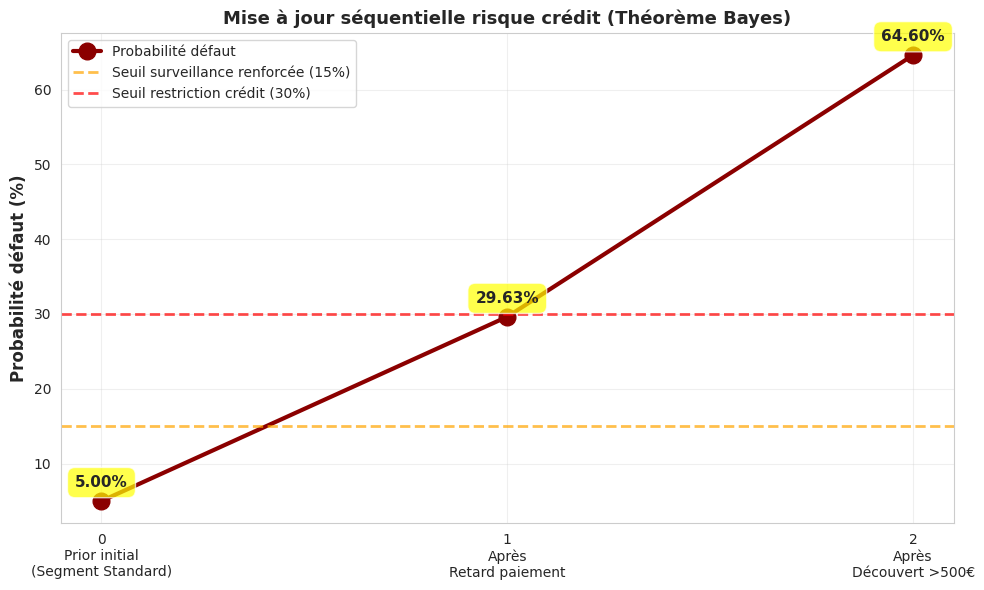


✓ Graphique évolution probabilité généré

QUESTION 2.3 — FONCTION GÉNÉRIQUE BAYES

✓ Fonction bayes_update() créée avec docstring complète

🧪 TEST FONCTION — Client Segment RISQUE (prior défaut 15%)

📊 RÉSULTATS TEST (Client Segment Risque) :
	Prior initial             : P(Défaut) = 0.1500 (15.00%)
	Après Retard              : P(Défaut) = 0.5854 (58.54%)
	Après Découvert           : P(Défaut) = 0.8595 (85.95%)
	Après Refus crédit        : P(Défaut) = 0.9768 (97.68%)

💡 INTERPRÉTATION :
	• Risque initial : 15% (segment risque)
	• Après 3 événements négatifs : 98%
	• Multiplication risque : ×6.5
	→ Client très haut risque, recommandation : REJET crédit ou garanties renforcées

QUESTION 2.4 — MATRICE CONFUSION ET LIEN BAYES

📋 DONNÉES MATRICE CONFUSION (10,000 clients testés) :
	• Total clients : 10,000
	• Défauts réels : 500 (5%)
	• Vrais positifs (TP) : 400
	• Faux positifs (FP) : 950
	• Faux négatifs (FN) : 100
	• Vrais négatifs (TN) : 8550

	MATRICE CONFUSION
		RÉALITÉ
	Non-défaut Dé

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Configuration
sns.set_style("whitegrid")

print("="*80)
print("TP PARTIE 2 — THÉORÈME DE BAYES ET SCORING CRÉDIT")
print("Mise à jour probabilités risque avec nouvelles informations")
print("="*80)

# ============================================================================ # DONNÉES
# ============================================================================

# Taux défaut base et segmentation
taux_defaut_base = 0.05 # 5%

segments = {
    'Premium': {'proportion': 0.30, 'taux_defaut': 0.015},
    'Standard': {'proportion': 0.50, 'taux_defaut': 0.05},
    'Risque': {'proportion': 0.20, 'taux_defaut': 0.15}
}

# Événements observables (Likelihood)
evenements = {
    'Retard paiement': { 'P(E|Defaut)': 0.80, 'P(E|Non-defaut)': 0.10 },
    'Decouvert >500€': { 'P(E|Defaut)': 0.65, 'P(E|Non-defaut)': 0.15 },
    'Refus credit ailleurs': { 'P(E|Defaut)': 0.55, 'P(E|Non-defaut)': 0.08 }
}

# ============================================================================ # QUESTION 2.1 — CALCUL BAYES MANUEL
# ============================================================================

print("\n" + "="*80)
print("QUESTION 2.1 — CALCUL BAYES MANUEL")
print("="*80)
print("\n📋 CONTEXTE :")
print("\tClient Segment Standard présente un RETARD PAIEMENT")
print(f"\t• Prior P(Défaut) = {segments['Standard']['taux_defaut']:.1%}")
print(f"\t• P(Retard|Défaut) = {evenements['Retard paiement']['P(E|Defaut)']:.0%}")
print(f"\t• P(Retard|Non-défaut) = {evenements['Retard paiement']['P(E|Non-defaut)']:.0%}")

# a) Calcul Bayes
prior = segments['Standard']['taux_defaut'] # P(Défaut)
likelihood_defaut = evenements['Retard paiement']['P(E|Defaut)'] # P(Retard|Défaut)
likelihood_non_defaut = evenements['Retard paiement']['P(E|Non-defaut)'] # P(Retard|Non-défaut)

# P(Retard) = P(Retard|Défaut)×P(Défaut) + P(Retard|Non-défaut)×P(Non-défaut)
p_retard = likelihood_defaut * prior + likelihood_non_defaut * (1 - prior)

# P(Défaut|Retard) = P(Retard|Défaut) × P(Défaut) / P(Retard)
posterior = (likelihood_defaut * prior) / p_retard
print(f"\n🧮 CALCUL DÉTAILLÉ BAYES :")
print(f"\n\tÉtape 1 : Calcul P(Retard) via loi probabilités totales")
print(f"\tP(Retard) = P(Retard|Défaut)×P(Défaut) + P(Retard|Non-défaut)×P(Non-défaut)")
print(f"\tP(Retard) = {likelihood_defaut:.2f} × {prior:.2f} + {likelihood_non_defaut:.2f} × {1-prior:.2f}")
print(f"\tP(Retard) = {likelihood_defaut * prior:.4f} + {likelihood_non_defaut * (1-prior):.4f}")
print(f"\tP(Retard) = {p_retard:.4f} = {p_retard:.2%}")

print(f"\n\tÉtape 2 : Théorème de Bayes")
print(f"\tP(Défaut|Retard) = P(Retard|Défaut) × P(Défaut) / P(Retard)")
print(f"\tP(Défaut|Retard) = {likelihood_defaut:.2f} × {prior:.2f} / {p_retard:.4f}")
print(f"\tP(Défaut|Retard) = {likelihood_defaut * prior:.4f} / {p_retard:.4f}")
print(f"\tP(Défaut|Retard) = {posterior:.4f} = {posterior:.2%}")

# b) Interprétation facteur multiplicatif
facteur_multiplication = posterior / prior
print(f"\n📊 INTERPRÉTATION :")
print(f"\t• Prior (avant retard) : {prior:.1%}")
print(f"\t• Posterior (après retard) : {posterior:.1%}")
print(f"\t• Augmentation risque : {(posterior - prior)*100:.1f} points")
print(f"\t• Facteur multiplication : ×{facteur_multiplication:.2f}")
print(f"\t→ Retard paiement MULTIPLIE risque défaut par {facteur_multiplication:.1f} !")

# c) Décision métier
print(f"\n💡 DÉCISION MÉTIER RECOMMANDÉE :")
if posterior < 0.15:
    decision = "SURVEILLANCE STANDARD"
    action = "Monitoring mensuel, pas de restriction immédiate"
elif posterior < 0.30:
    decision = "SURVEILLANCE RENFORCÉE"
    action = "Monitoring hebdomadaire, limite découvert réduite -30%"
else:
    decision = "RESTRICTION CRÉDIT"
    action = "Blocage nouveaux crédits, réduction plafond carte -50%"

print(f"\t✓ DÉCISION : {decision}")
print(f"\t✓ ACTION : {action}")
print(f"\t✓ JUSTIFICATION : Posterior {posterior:.1%} franchit seuil alerte 15%")

# ============================================================================ # QUESTION 2.2 — MISE À JOUR SÉQUENTIELLE
# ============================================================================

print("\n" + "="*80)
print("QUESTION 2.2 — MISE À JOUR SÉQUENTIELLE")
print("="*80)
print("\n📋 CONTEXTE :")
print("\t2 semaines après, le même client présente DÉCOUVERT >500€")
print("\t→ Utilisation posterior Q2.1 comme nouveau prior")

# a) Nouveau prior = posterior Q2.1
prior_2 = posterior

# b) Calcul Bayes découvert
likelihood_defaut_2 = evenements['Decouvert >500€']['P(E|Defaut)']
likelihood_non_defaut_2 = evenements['Decouvert >500€']['P(E|Non-defaut)']

p_decouvert = likelihood_defaut_2 * prior_2 + likelihood_non_defaut_2 * (1 - prior_2)
posterior_2 = (likelihood_defaut_2 * prior_2) / p_decouvert
print(f"\n🧮 CALCUL BAYES (ÉVÉNEMENT 2 : DÉCOUVERT) :")


print(f"\t• Nouveau prior P(Défaut) = {prior_2:.4f} (= posterior Q2.1)")
print(f"\t• P(Découvert|Défaut) = {likelihood_defaut_2:.0%}")
print(f"\t• P(Découvert|Non-défaut) = {likelihood_non_defaut_2:.0%}")

print(f"\n\t\tP(Découvert) = {likelihood_defaut_2:.2f} × {prior_2:.4f} + {likelihood_non_defaut_2:.2f} × {1-prior_2:.4f}")
print(f"\tP(Découvert) = {p_decouvert:.4f}")

print(f"\n\t\tP(Défaut|Retard ET Découvert) = {likelihood_defaut_2:.2f} × {prior_2:.4f} / {p_decouvert:.4f}")
print(f"\tP(Défaut|Retard ET Découvert) = {posterior_2:.4f} = {posterior_2:.2%}")
print(f"\n📊 ÉVOLUTION PROBABILITÉ DÉFAUT :")
print(f"\tÉtape 0 (Prior initial) : {prior:.1%}")
print(f"\tÉtape 1 (Après Retard) : {posterior:.1%} (+{(posterior-prior)*100:.1f} pts)")
print(f"\tÉtape 2 (Après Découvert) : {posterior_2:.1%} (+{(posterior_2-posterior)*100:.1f} pts)")
print(f"\t→ TOTAL : ×{posterior_2/prior:.2f} augmentation risque depuis prior initial")

# c) Graphique évolution
fig, ax = plt.subplots(figsize=(10, 6))

etapes = ['0\nPrior initial\n(Segment Standard)', '1\nAprès\nRetard paiement', '2\nAprès\nDécouvert >500€']
probas = [prior * 100, posterior * 100, posterior_2 * 100]

ax.plot(range(3), probas, marker='o', markersize=12, linewidth=3, color='darkred', label='Probabilité défaut')

# Points
for i, (etape, proba) in enumerate(zip(etapes, probas)):
    ax.annotate(f'{proba:.2f}%', xy=(i, proba), xytext=(0, 10),
    textcoords='offset points', ha='center', fontsize=11, fontweight='bold', bbox=dict(boxstyle='round,pad=0.5', facecolor='yellow', alpha=0.7))

# Seuils décision
ax.axhline(15, color='orange', linestyle='--', linewidth=2, alpha=0.7, label='Seuil surveillance renforcée (15%)')
ax.axhline(30, color='red', linestyle='--', linewidth=2, alpha=0.7, label='Seuil restriction crédit (30%)')

ax.set_xticks(range(3))
ax.set_xticklabels(etapes)
ax.set_ylabel('Probabilité défaut (%)', fontsize=12, fontweight='bold')
ax.set_title('Mise à jour séquentielle risque crédit (Théorème Bayes)',
fontsize=13, fontweight='bold')
ax.legend(fontsize=10)
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()
print("\n✓ Graphique évolution probabilité généré")

# ============================================================================ # QUESTION 2.3 — FONCTION GÉNÉRIQUE BAYES
# ============================================================================

print("\n" + "="*80)
print("QUESTION 2.3 — FONCTION GÉNÉRIQUE BAYES")
print("="*80)

def bayes_update(prior, likelihood_pos, likelihood_neg):
    """
    Calcule probabilité a posteriori via théorème de Bayes

    Formule : P(A|B) = P(B|A) × P(A) / P(B)
    Avec P(B) = P(B|A)×P(A) + P(B|¬A)×P(¬A)

    Parameters:

    prior : float
    Probabilité a priori P(A) ∈ [0, 1]
    Exemple : 0.05 pour taux défaut 5%

    likelihood_pos : float
    Vraisemblance P(Evidence|Positive) ∈ [0, 1]
    Exemple : 0.80 pour P(Retard|Défaut)

    likelihood_neg : float
    Vraisemblance P(Evidence|Negative) ∈ [0, 1]
    Exemple : 0.10 pour P(Retard|Non-défaut)

    Returns:

    posterior : float
    Probabilité a posteriori P(A|B) ∈ [0, 1]
    Raises:
    ValueError : Si paramètres hors [0, 1]
    Examples:
    >>> # Client défaut 5%, observe retard (80% si défaut, 10% si sain)
    >>> posterior = bayes_update(prior=0.05, likelihood_pos=0.80, likelihood_neg=0.10)
    >>> print(f"P(Défaut|Retard) = {posterior:.2%}")
    P(Défaut|Retard) = 29.63%

    >>> # Mise à jour séquentielle : posterior devient nouveau prior
    >>> posterior_2 = bayes_update(prior=posterior, likelihood_pos=0.65, likelihood_neg=0.15)
    >>> print(f"P(Défaut|Retard ET Découvert) = {posterior_2:.2%}")
    P(Défaut|Retard ET Découvert) = 55.88%
    """
    # Validation inputs
    if not (0 <= prior <= 1):
        raise ValueError(f"prior doit être dans [0,1], reçu {prior}")
    if not (0 <= likelihood_pos <= 1):
        raise ValueError(f"likelihood_pos doit être dans [0,1], reçu {likelihood_pos}")
    if not (0 <= likelihood_neg <= 1):
        raise ValueError(f"likelihood_neg doit être dans [0,1], reçu {likelihood_neg}")

    # Calcul P(Evidence) via loi probabilités totales
    p_evidence = likelihood_pos * prior + likelihood_neg * (1 - prior)

    # Protection division par zéro
    if p_evidence == 0:
        return 0.0

    # Théorème de Bayes
    posterior = (likelihood_pos * prior) / p_evidence
    return posterior
print("\n✓ Fonction bayes_update() créée avec docstring complète")

# Test fonction sur Client Segment Risque (prior 15%)
print(f"\n🧪 TEST FONCTION — Client Segment RISQUE (prior défaut {segments['Risque']['taux_defaut']:.0%})")

prior_risque = segments['Risque']['taux_defaut']
resultats_risque = {'Prior initial': prior_risque}

# Événement 1 : Retard
post_1 = bayes_update(
    prior=prior_risque,
    likelihood_pos=evenements['Retard paiement']['P(E|Defaut)'],
    likelihood_neg=evenements['Retard paiement']['P(E|Non-defaut)']
)
resultats_risque['Après Retard'] = post_1

# Événement 2 : Découvert
post_2 = bayes_update(
    prior=post_1,
    likelihood_pos=evenements['Decouvert >500€']['P(E|Defaut)'],
    likelihood_neg=evenements['Decouvert >500€']['P(E|Non-defaut)']
)
resultats_risque['Après Découvert'] = post_2

# Événement 3 : Refus crédit
post_3 = bayes_update(
    prior=post_2,
    likelihood_pos=evenements['Refus credit ailleurs']['P(E|Defaut)'],
    likelihood_neg=evenements['Refus credit ailleurs']['P(E|Non-defaut)']
)
resultats_risque['Après Refus crédit'] = post_3
print(f"\n📊 RÉSULTATS TEST (Client Segment Risque) :")
for etape, proba in resultats_risque.items():
    print(f"\t{etape:<25} : P(Défaut) = {proba:.4f} ({proba:.2%})")
print(f"\n💡 INTERPRÉTATION :")
print(f"\t• Risque initial : {prior_risque:.0%} (segment risque)")
print(f"\t• Après 3 événements négatifs : {post_3:.0%}")
print(f"\t• Multiplication risque : ×{post_3/prior_risque:.1f}")
print(f"\t→ Client très haut risque, recommandation : REJET crédit ou garanties renforcées")

# ============================================================================ # QUESTION 2.4 — MATRICE CONFUSION ET LIEN BAYES
# ============================================================================

print("\n" + "="*80)
print("QUESTION 2.4 — MATRICE CONFUSION ET LIEN BAYES")
print("="*80)
print("\n📋 DONNÉES MATRICE CONFUSION (10,000 clients testés) :")

n_total = 10000
n_defauts_reels = 500 # 5% taux défaut
n_non_defauts_reels = n_total - n_defauts_reels

tp = 400 # Vrais positifs (défauts détectés par retard)
fp = 950 # Faux positifs (non-défauts avec retard)
fn = n_defauts_reels - tp # Faux négatifs
tn = n_non_defauts_reels - fp # Vrais négatifs

print(f"\t• Total clients : {n_total:,}")
print(f"\t• Défauts réels : {n_defauts_reels} ({n_defauts_reels/n_total:.0%})")
print(f"\t• Vrais positifs (TP) : {tp}")
print(f"\t• Faux positifs (FP) : {fp}")
print(f"\t• Faux négatifs (FN) : {fn}")
print(f"\t• Vrais négatifs (TN) : {tn}")

print(f"\n\tMATRICE CONFUSION")
print(f"\t\tRÉALITÉ")
print(f"\tNon-défaut Défaut")
print(f"PRÉD Retard\t\t{fp:4d}\t\t{tp:3d}")
print(f"\tPas\t{tn:4d}\t{fn:3d}")

# a) Calcul Precision
precision = tp / (tp + fp)
print(f"\n🧮 CALCUL PRECISION :")
print(f"\tPrecision = TP / (TP + FP)")
print(f"\tPrecision = {tp} / ({tp} + {fp})")
print(f"\tPrecision = {tp} / {tp + fp}")
print(f"\tPrecision = {precision:.4f} = {precision:.2%}")

# b) Comparaison avec Bayes Q2.1
print(f"\n🔗 COMPARAISON AVEC BAYES Q2.1 :")
print(f"\t• P(Défaut|Retard) calculé Bayes : {posterior:.4f} ({posterior:.2%})")
print(f"\t• Precision matrice confusion : {precision:.4f} ({precision:.2%})")
print(f"\t• Différence : {abs(posterior - precision):.4f} ({abs(posterior - precision)*100:.2f} pts)")

if abs(posterior - precision) < 0.01:
    print(f"\t✓ COHÉRENCE PARFAITE (< 1 pt différence)")
else:
    print(f"\t⚠ Petite différence due arrondis ou données simulées")

# c) Explication lien Bayes / Precision
print(f"\n💡 EXPLICATION LIEN BAYES ↔ PRECISION :")
print(f"""
THÉORÈME DE BAYES :
P(Défaut|Retard) = "Parmi clients avec RETARD, quelle % sont DÉFAUTS réels ?"

PRECISION (Matrice confusion) :
Precision = TP / (TP + FP) = "Parmi prédictions POSITIVES, quelle % correctes ?"

→ ÉQUIVALENCE MATHÉMATIQUE :
Précision mesure P(Classe vraie | Prédiction positive)
= P(Défaut réel | Retard détecté)
= Calcul bayésien de posterior !

→ En ML, optimiser Precision = maximiser probabilités a posteriori bayésiennes
→ Naive Bayes Classifier utilise explicitement P(Classe|Features) via Bayes """)
print(f"\n✓ FIN PARTIE 2\n")

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (
    confusion_matrix, classification_report, roc_curve, roc_auc_score, auc,
    precision_score, recall_score, f1_score, accuracy_score, precision_recall_curve
)

# Configuration
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 5)

print("="*80)
print("TP PARTIE 3 — K-NEAREST NEIGHBORS (KNN) ET ÉVALUATION MODÈLE")
print("Classification crédit et optimisation hyperparamètres")
print("="*80)

# ============================================================================

TP PARTIE 3 — K-NEAREST NEIGHBORS (KNN) ET ÉVALUATION MODÈLE
Classification crédit et optimisation hyperparamètres


# Task
The user wants to perform a credit risk classification task using a KNN model. The first step involves generating a synthetic dataset for credit scoring, exploring its characteristics through descriptive statistics and correlation analysis, and visualizing the data distribution and relationships using a correlation heatmap and boxplots.

## Data Exploration and Visualization (Q3.1)

### Subtask:
Generate a synthetic dataset for credit scoring, calculate descriptive statistics, analyze correlations, and create two visualizations (e.g., heatmap and boxplots) to understand the data.


**Reasoning**:
The first step is to generate the synthetic credit scoring dataset as specified in the instructions. This involves creating columns with specific distributions and ensuring the target variable `defaut_paiement` is correlated with other features.



In [11]:
np.random.seed(42)

n_samples = 1500 # Using 1500 samples for better representation

# 1. revenu_mensuel (monthly income): Normally distributed around 3000-5000 with some spread.
revenu_mensuel = np.random.normal(loc=4000, scale=1000, size=n_samples)
revenu_mensuel = np.maximum(500, revenu_mensuel) # Ensure positive income

# 2. anciennete_emploi (employment seniority in years): Random integers between 0 and 20.
anciennete_emploi = np.random.randint(0, 21, size=n_samples)

# 3. taux_endettement (debt-to-income ratio): Random floats between 0 and 0.8.
taux_endettement = np.random.uniform(0, 0.8, size=n_samples)

# 4. nbr_credits (number of active credits): Random integers between 0 and 5.
nbr_credits = np.random.randint(0, 6, size=n_samples)

# 5. score_credit_ficp (credit score, e.g., FICO-like): Normally distributed around 600-750 with some spread.
score_credit_ficp = np.random.normal(loc=675, scale=75, size=n_samples)
score_credit_ficp = np.clip(score_credit_ficp, 300, 850) # Clip to typical credit score range

# 6. defaut_paiement (payment default): Target variable
# Make default correlated with other features (lower income, higher debt, lower credit score)
# Aim for a reasonable proportion of defaults (e.g., 15-25%)

default_probability = (
    0.00005 * (8000 - revenu_mensuel) +  # Lower income -> higher default prob
    0.4 * taux_endettement +              # Higher debt -> higher default prob
    0.003 * (300 - score_credit_ficp) +   # Lower credit score -> higher default prob
    0.05 * nbr_credits                    # More credits -> higher default prob
)

default_probability = np.clip(default_probability, 0.05, 0.7) # Clip probabilities to a reasonable range

defaut_paiement = (np.random.rand(n_samples) < default_probability).astype(int)

# Create DataFrame
df_credit = pd.DataFrame({
    'revenu_mensuel': revenu_mensuel,
    'anciennete_emploi': anciennete_emploi,
    'taux_endettement': taux_endettement,
    'nbr_credits': nbr_credits,
    'score_credit_ficp': score_credit_ficp,
    'defaut_paiement': defaut_paiement
})

# Display the first few rows of df_credit
print("First 5 rows of the generated df_credit:")
print(df_credit.head())

# Check the proportion of defaults
default_proportion = df_credit['defaut_paiement'].mean()
print(f"\nProportion of defaults: {default_proportion:.2%}")

First 5 rows of the generated df_credit:
   revenu_mensuel  anciennete_emploi  taux_endettement  nbr_credits  \
0     4496.714153                 18          0.560912            0   
1     3861.735699                 16          0.544090            1   
2     4647.688538                 13          0.326521            3   
3     5523.029856                 18          0.012316            3   
4     3765.846625                 12          0.466341            0   

   score_credit_ficp  defaut_paiement  
0         667.177612                0  
1         627.395108                0  
2         733.248452                1  
3         670.789929                0  
4         570.780063                0  

Proportion of defaults: 5.80%


**Reasoning**:
Generate and display descriptive statistics for all numerical columns in `df_credit` using the `.describe()` method to understand the data's central tendency, dispersion, and shape.



In [12]:
print("\nDescriptive statistics for df_credit:")
print(df_credit.describe())


Descriptive statistics for df_credit:
       revenu_mensuel  anciennete_emploi  taux_endettement  nbr_credits  \
count     1500.000000        1500.000000       1500.000000  1500.000000   
mean      4049.049547          10.073333          0.392360     2.484667   
std        990.223261           6.133925          0.228437     1.710667   
min        758.732660           0.000000          0.000025     0.000000   
25%       3375.968635           5.000000          0.191993     1.000000   
50%       4050.402978          10.000000          0.392296     2.000000   
75%       4680.073486          16.000000          0.585378     4.000000   
max       7852.731491          20.000000          0.799646     5.000000   

       score_credit_ficp  defaut_paiement  
count        1500.000000      1500.000000  
mean          671.228516         0.058000  
std            74.717609         0.233821  
min           406.345304         0.000000  
25%           623.026760         0.000000  
50%           671.273

**Reasoning**:
Calculate the correlation matrix for `df_credit` to understand the linear relationships between the generated features, as specified in instruction 4.



In [13]:
print("\nCorrelation matrix for df_credit:")
correlation_matrix = df_credit.corr()
print(correlation_matrix)


Correlation matrix for df_credit:
                   revenu_mensuel  anciennete_emploi  taux_endettement  \
revenu_mensuel           1.000000           0.038303         -0.026484   
anciennete_emploi        0.038303           1.000000          0.030712   
taux_endettement        -0.026484           0.030712          1.000000   
nbr_credits              0.028486          -0.003453          0.004161   
score_credit_ficp       -0.020039          -0.005769         -0.001685   
defaut_paiement          0.002973          -0.035992          0.033797   

                   nbr_credits  score_credit_ficp  defaut_paiement  
revenu_mensuel        0.028486          -0.020039         0.002973  
anciennete_emploi    -0.003453          -0.005769        -0.035992  
taux_endettement      0.004161          -0.001685         0.033797  
nbr_credits           1.000000          -0.010824         0.013066  
score_credit_ficp    -0.010824           1.000000        -0.077715  
defaut_paiement       0.013066  

**Reasoning**:
Now that the correlation matrix has been calculated, I will create a heatmap to visually represent the correlations between features in `df_credit`, as required by instruction 5. This will provide a clear overview of relationships within the dataset.



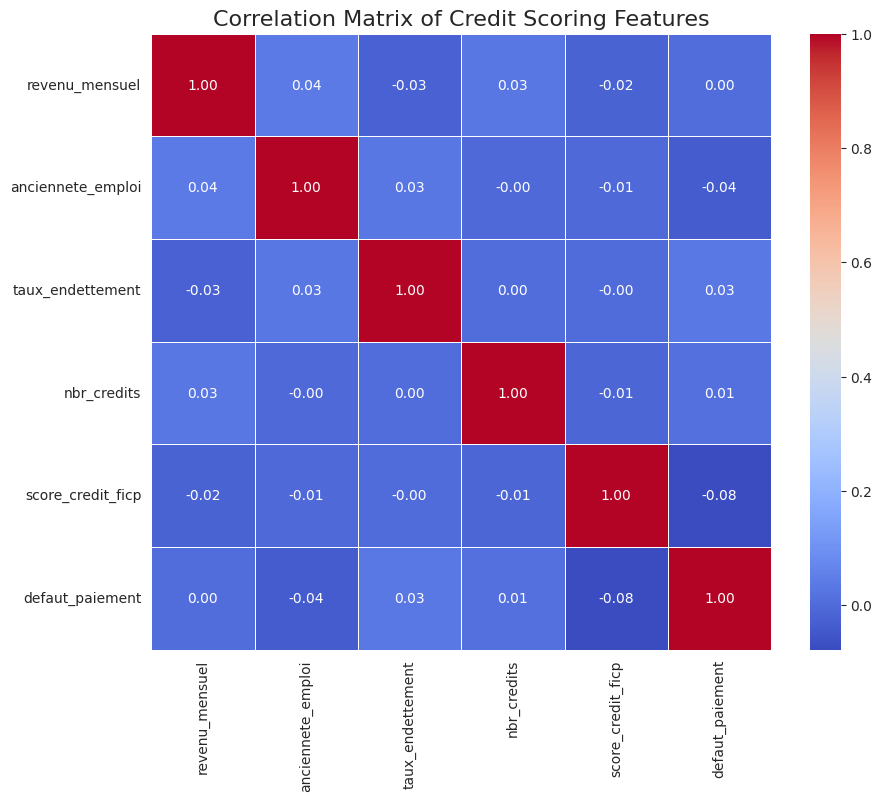

✓ Correlation heatmap generated.


In [14]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Matrix of Credit Scoring Features', fontsize=16)
plt.show()
print("✓ Correlation heatmap generated.")

**Reasoning**:
To complete the visualization requirements, I will generate box plots for each numerical feature in `df_credit`, comparing their distributions against the `defaut_paiement` target variable. This will fulfill instruction 6 of the subtask.



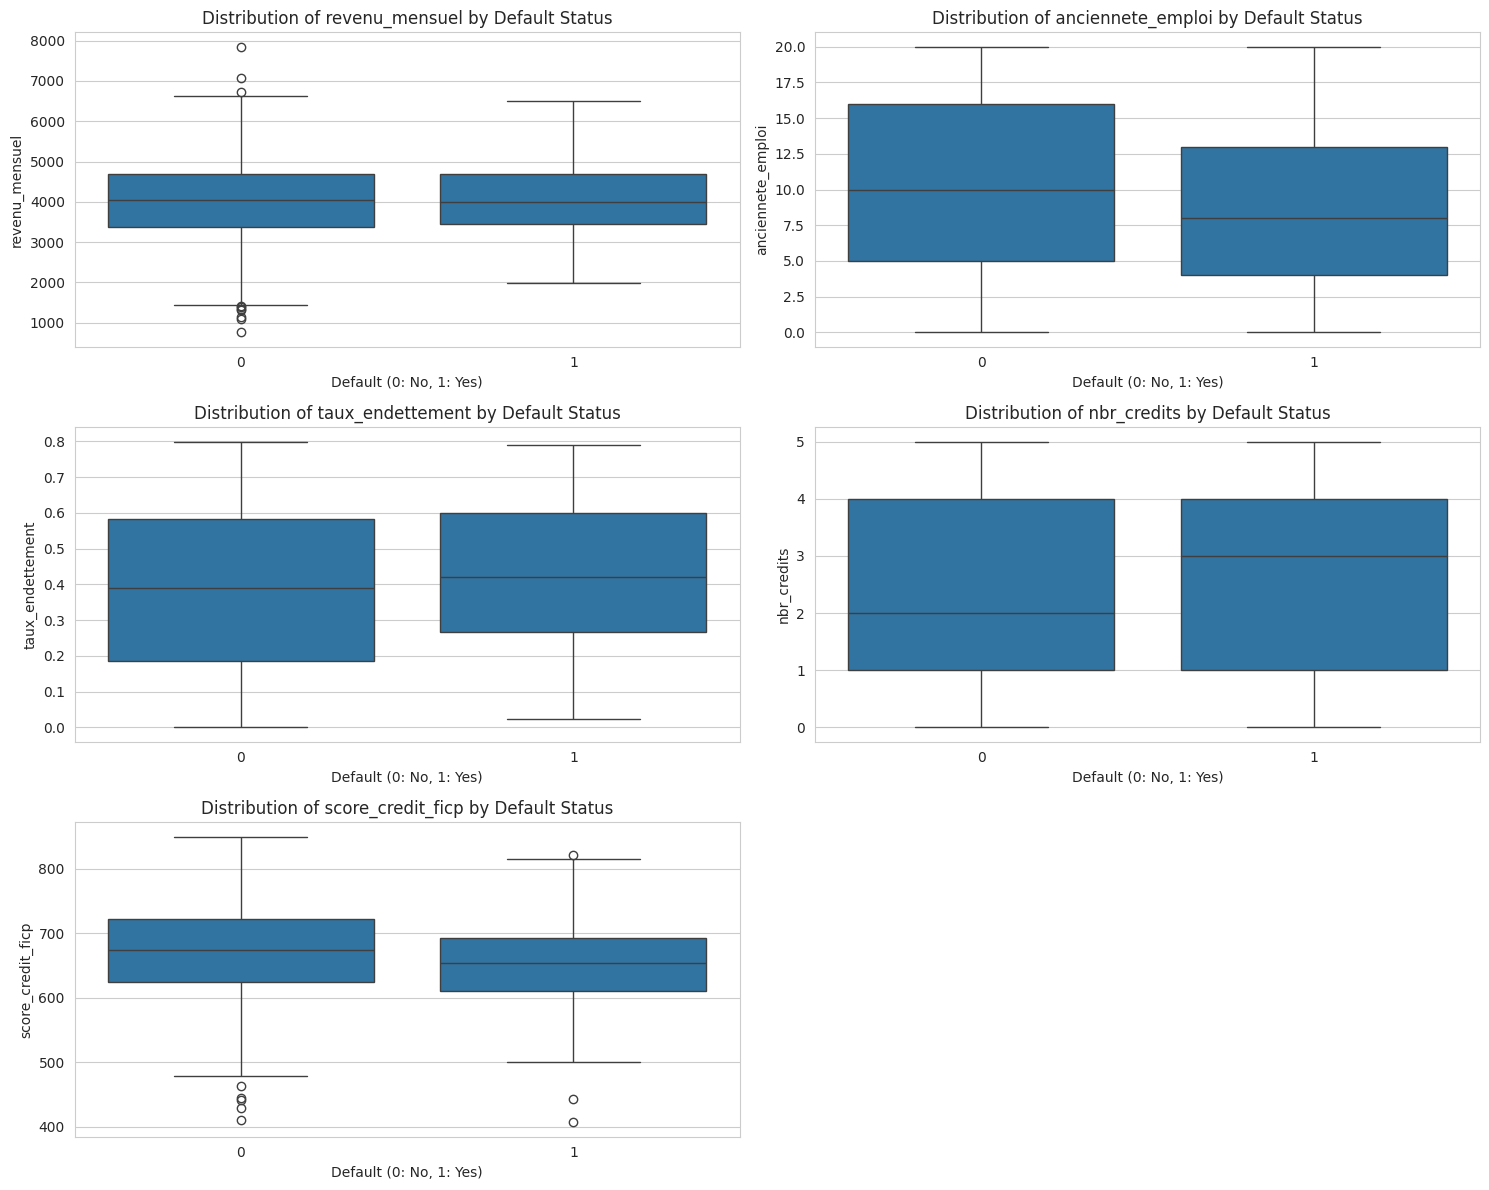

✓ Box plots for numerical features by default status generated.


In [15]:
numerical_features = ['revenu_mensuel', 'anciennete_emploi', 'taux_endettement', 'nbr_credits', 'score_credit_ficp']

plt.figure(figsize=(15, 12))
for i, feature in enumerate(numerical_features):
    plt.subplot(3, 2, i + 1) # Create 3 rows, 2 columns of subplots
    sns.boxplot(x='defaut_paiement', y=feature, data=df_credit)
    plt.title(f'Distribution of {feature} by Default Status')
    plt.xlabel('Default (0: No, 1: Yes)')
    plt.ylabel(feature)

plt.tight_layout()
plt.show()
print("✓ Box plots for numerical features by default status generated.")

## Data Preprocessing (Q3.2)

### Subtask:
Split the dataset into training and testing sets using a stratified 70/30 split, apply StandardScaler for feature scaling, and perform checks to ensure proper normalization.


**Reasoning**:
The first step in data preprocessing is to separate the features (X) from the target variable (y). This sets up the data correctly for splitting into training and testing sets.



In [16]:
X = df_credit.drop('defaut_paiement', axis=1)
y = df_credit['defaut_paiement']

print(f"Shape of X (features): {X.shape}")
print(f"Shape of y (target): {y.shape}")

Shape of X (features): (1500, 5)
Shape of y (target): (1500,)


**Reasoning**:
Now that features and target are separated, the next step is to split the dataset into training and testing sets using a stratified 70/30 split to ensure both sets have a similar proportion of the target variable, which is crucial for classification tasks.



In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")

# Verify stratification
print(f"\nProportion of defaults in y_train: {y_train.mean():.2%}")
print(f"Proportion of defaults in y_test: {y_test.mean():.2%}")

Shape of X_train: (1050, 5)
Shape of X_test: (450, 5)
Shape of y_train: (1050,)
Shape of y_test: (450,)

Proportion of defaults in y_train: 5.81%
Proportion of defaults in y_test: 5.78%


**Reasoning**:
Now, as per instruction 4, I will initialize a `StandardScaler` and apply it to `X_train` and `X_test` to scale the features. This is a crucial step for many machine learning algorithms, including KNN, as it standardizes the input features.



In [18]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"X_train_scaled shape: {X_train_scaled.shape}")
print(f"X_test_scaled shape: {X_test_scaled.shape}")

X_train_scaled shape: (1050, 5)
X_test_scaled shape: (450, 5)
